# 人脸识别

这章的方法属于机器学习的范畴，自定义特征去匹配。而不是深度学习，自动提取特征。

In [1]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def show(img, title='Image'):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # 不显示坐标轴
    plt.title(title) # 图像题目
    plt.show()

# Haar级联分类器

[[5081 1382  618  618]
 [5869 4181  568  568]]
发现2个人脸！


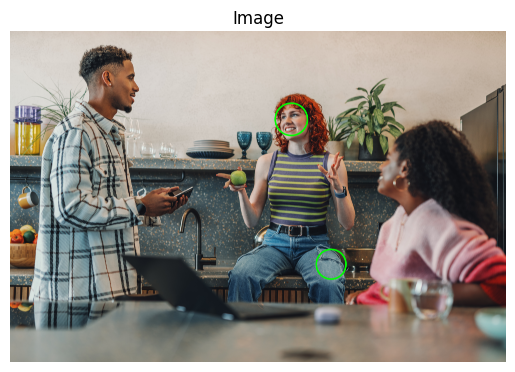

True

In [3]:
# 读取待检测的图像
image = cv2.imread('images/samsung.jpg')
# 获取XML文件，加载人脸检测器
# faceCascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
# 色彩转换，转换为灰度图像
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# 调用函数detectMultiScale
faces = face_cascade.detectMultiScale(
    gray,
    scaleFactor = 1.15,
    minNeighbors = 5,
    minSize = (200,200)
)
print(faces)
# 打印输出的测试结果
print("发现{0}个人脸！".format(len(faces)))
# 逐个标注人脸
for(x, y, w, h) in faces:
    # cv2.rectangle(image, (x, y), (x+w, y+w), (0,255,0),2) #矩形标注
    cv2.circle(image, (int((x+x+w)/2), int((y+y+h)/2)), int(w/2), (0,255,0),30)
# 显示结果
show(image)
# 保存检测结果
cv2.imwrite("re.jpg", image)

# LBPH人脸识别

In [4]:
images=[]
images.append(cv2.imread("images/a1.jpg", cv2.IMREAD_GRAYSCALE))
images.append(cv2.imread("images/a2.jpg", cv2.IMREAD_GRAYSCALE))
images.append(cv2.imread("images/b1.jpg", cv2.IMREAD_GRAYSCALE))
images.append(cv2.imread("images/b2.jpg", cv2.IMREAD_GRAYSCALE))
labels=[0,0,1,1]
#print(labels)
recognizer = cv2.face.LBPHFaceRecognizer_create()
recognizer.train(images, np.array(labels))
predict_image=cv2.imread("images/a3.jpg", cv2.IMREAD_GRAYSCALE)
label, confidence= recognizer.predict(predict_image)
print("label=", label)
print("confidence=", confidence)

label= 0
confidence= 45.93487522441702


# EigenFaces人脸识别

In [5]:
images=[]
images.append(cv2.imread("images/a1.jpg", cv2.IMREAD_GRAYSCALE))
images.append(cv2.imread("images/a2.jpg", cv2.IMREAD_GRAYSCALE))
images.append(cv2.imread("images/b1.jpg", cv2.IMREAD_GRAYSCALE))
images.append(cv2.imread("images/b2.jpg", cv2.IMREAD_GRAYSCALE))
labels=[0,0,1,1]
#print(labels)
recognizer = cv2.face.EigenFaceRecognizer_create()
recognizer.train(images, np.array(labels))
predict_image=cv2.imread("images/a3.jpg", cv2.IMREAD_GRAYSCALE)
label, confidence= recognizer.predict(predict_image)
print("label=", label)
print("confidence=", confidence)

error: OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv_contrib/modules/face/src/eigen_faces.cpp:72: error: (-210:Unsupported format or combination of formats) In the Eigenfaces method all input samples (training images) must be of equal size! Expected 261696 pixels, but was 263016 pixels. in function 'train'


# Fisherfaces人脸识别

In [6]:
images=[]
images.append(cv2.imread("images/a1.jpg", cv2.IMREAD_GRAYSCALE))
images.append(cv2.imread("images/a2.jpg", cv2.IMREAD_GRAYSCALE))
images.append(cv2.imread("images/b1.jpg", cv2.IMREAD_GRAYSCALE))
images.append(cv2.imread("images/b2.jpg", cv2.IMREAD_GRAYSCALE))
labels=[0,0,1,1]
#print(labels)
recognizer = cv2.face.FisherFaceRecognizer_create()
recognizer.train(images, np.array(labels))
predict_image=cv2.imread("images/a3.jpg", cv2.IMREAD_GRAYSCALE)
label, confidence= recognizer.predict(predict_image)
print("label=", label)
print("confidence=", confidence)

error: OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv_contrib/modules/face/src/fisher_faces.cpp:81: error: (-210:Unsupported format or combination of formats) In the Fisherfaces method all input samples (training images) must be of equal size! Expected 261696 pixels, but was 263016 pixels. in function 'train'
